[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-511/blob/master/pima-classification-baseline-03.ipynb)


## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터셋 로드

In [2]:
df = pd.read_csv("data/diabetes_feature.csv")
df.shape

(768, 16)

In [3]:
# 데이터셋을 미리보기 합니다.

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


## 학습과 예측에 사용할 데이터셋 만들기

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [5]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan', 'low_glu_insulin']]
X.shape

(768, 9)

In [6]:
y = df['Outcome']
y.shape

(768,)

In [7]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split 으로 만듭니다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [8]:
# train 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_train.shape, y_train.shape

((614, 9), (614,))

In [9]:
# test 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_test.shape, y_test.shape

((154, 9), (154,))

## 머신러닝 알고리즘 사용하기

In [10]:
# DecisionTree 를 불러옵니다.

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=11, random_state=42)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

### 최적의 max_depth 값 찾기

In [11]:
from sklearn.metrics import accuracy_score

for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


### Grid Search

* https://scikit-learn.org/stable/modules/cross_validation.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [12]:
from sklearn.model_selection import GridSearchCV


model = DecisionTreeClassifier(random_state=42)
param_grid = {"max_depth": range(3, 12), 
              "max_features": [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    4.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_

In [13]:
clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

In [14]:
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=0.7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [15]:
clf.best_score_

0.8664934026389444

In [16]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.006471,0.000485,0.002686,0.000658,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.006573,0.000491,0.002635,0.000312,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.006613,0.000522,0.002681,0.000637,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.006644,0.000947,0.002781,0.000535,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.877049,0.859963,0.029149,4
27,0.006094,0.000273,0.002468,0.000401,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.861789,0.878049,0.837398,0.853659,0.860656,0.858310,0.013162,5


In [17]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [18]:
clf.score(X_test, y_test)

0.8701298701298701

### Random Search
<img src="https://i.imgur.com/N17CPGj.png">

출처 : http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf

In [19]:
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [20]:
max_depth = np.random.randint(3, 20, 10)
max_depth

array([ 3,  5,  8,  5,  5, 13,  5, 16, 18, 13])

In [21]:
max_features = np.random.uniform(0.7, 1.0, 100)

In [22]:
param_distributions = {"max_depth" :max_depth, 
                       "max_features": max_features,
                       "min_samples_split" : list(range(2, 7))
                      }
param_distributions

{'max_depth': array([ 3,  5,  8,  5,  5, 13,  5, 16, 18, 13]),
 'max_features': array([0.99106896, 0.81855538, 0.80462666, 0.98977458, 0.73282047,
        0.82150853, 0.84194348, 0.88743413, 0.99886695, 0.87119353,
        0.76534319, 0.80883467, 0.9150284 , 0.85429453, 0.77911168,
        0.9210062 , 0.79638464, 0.99281375, 0.99780265, 0.84750491,
        0.70992737, 0.9583918 , 0.75906882, 0.83963015, 0.75394577,
        0.93916341, 0.86509081, 0.81393384, 0.91599864, 0.7415089 ,
        0.85352664, 0.89897825, 0.83836258, 0.87044418, 0.72702334,
        0.85906734, 0.8030263 , 0.81262126, 0.83317934, 0.84651679,
        0.95067863, 0.77310569, 0.97842667, 0.78061133, 0.86059737,
        0.83677233, 0.80382649, 0.8432214 , 0.9875819 , 0.82981433,
        0.83095953, 0.87872657, 0.7961058 , 0.8113246 , 0.91099763,
        0.79671905, 0.97237741, 0.90046943, 0.92105654, 0.82158186,
        0.81755379, 0.8291375 , 0.85454379, 0.77120579, 0.7363162 ,
        0.98492692, 0.75220163, 0.824

In [23]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
                   param_distributions,
                   n_iter=1000,
                   scoring="accuracy",
                   n_jobs=-1,
                   cv=5,
                   random_state=42
                  )

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
            

In [24]:
clf.best_params_

{'min_samples_split': 4, 'max_features': 0.7415089045216909, 'max_depth': 5}

In [25]:
clf.best_score_

0.8697454351592697

In [26]:
clf.score(X_test, y_test)

0.8701298701298701

In [27]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
772,0.006956,0.001394,0.002171,0.000143,4,0.752202,5,"{'min_samples_split': 4, 'max_features': 0.752...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
731,0.022266,0.008578,0.005994,0.004555,4,0.709927,5,"{'min_samples_split': 4, 'max_features': 0.709...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
983,0.024347,0.034837,0.008484,0.007401,4,0.73282,5,"{'min_samples_split': 4, 'max_features': 0.732...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
687,0.005775,0.000105,0.002380,0.000491,4,0.765343,5,"{'min_samples_split': 4, 'max_features': 0.765...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
326,0.006005,0.001090,0.005060,0.005768,4,0.751261,5,"{'min_samples_split': 4, 'max_features': 0.751...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1


## 학습과 예측하기

In [28]:
# 학습을 시킵니다.
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [29]:
feature_names = X_train.columns.tolist()

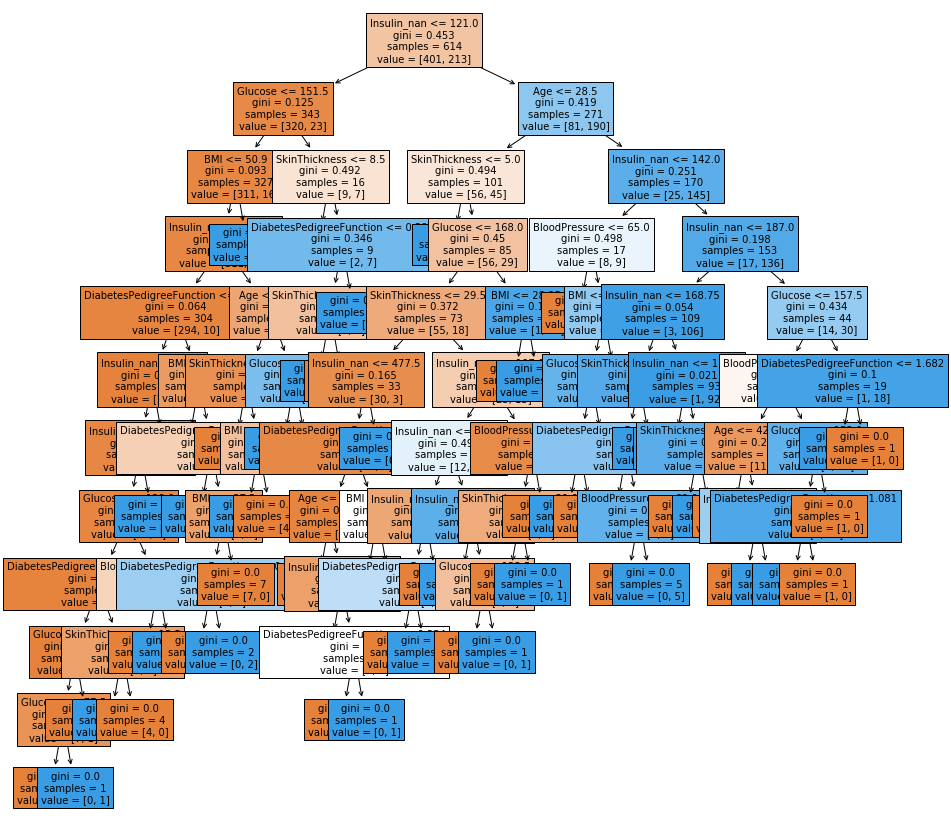

In [30]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 15))
tree = plot_tree(model, feature_names=feature_names, fontsize=10, filled=True)

In [31]:
# 예측을 하고 결과를 y_predict에 담습니다.
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

## 정확도(Accuracy) 측정하기

In [32]:
# 다르게 예측한 갯수를 구해서 diff_count 에 할당해 줍니다.

abs(y_predict - y_test).sum()

28

In [33]:
# accuracy score를 구합니다.

accuracy_score(y_test, y_predict) * 100

81.81818181818183